In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [3]:
df = pd.read_csv(r"C:\Users\dell\Desktop\MyDocs\Docs\MK\user_behavior_dataset.csv")
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [5]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

warnings.filterwarnings("ignore")

In [7]:
df=df.drop('User ID',axis=1)

In [9]:
df.describe()

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


In [11]:
df[['App Usage Time (min/day)','Number of Apps Installed','Data Usage (MB/day)','Age']].corr()

,App Usage Time (min/day),Number of Apps Installed,Data Usage (MB/day),Age
App Usage Time (min/day),1.000000,0.955253,0.942308,0.004382
Number of Apps Installed,0.955253,1.000000,0.934800,0.004034
Data Usage (MB/day),0.942308,0.934800,1.000000,0.003999
Age,0.004382,0.004034,0.003999,1.000000


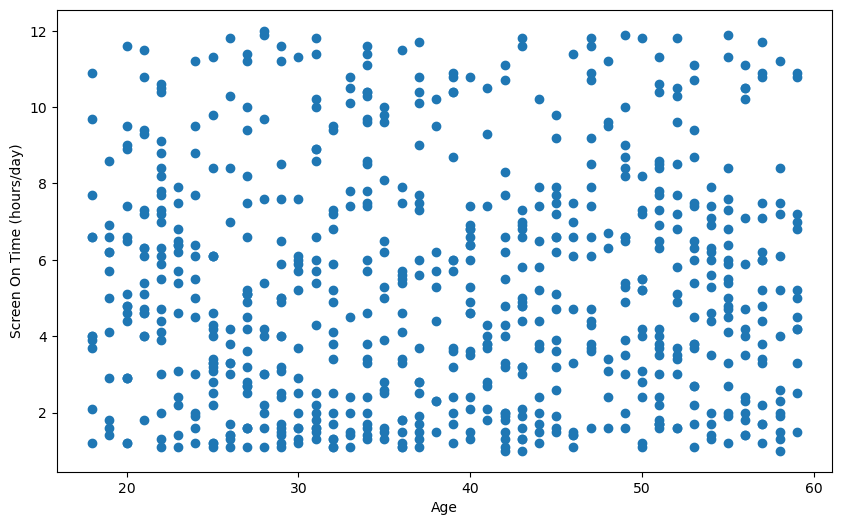

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(x='Age', y="Screen On Time (hours/day)", data=df)
plt.xlabel("Age")
plt.ylabel("Screen On Time (hours/day)")
plt.show()

<Axes: xlabel='Device Model', ylabel='Screen On Time (hours/day)'>

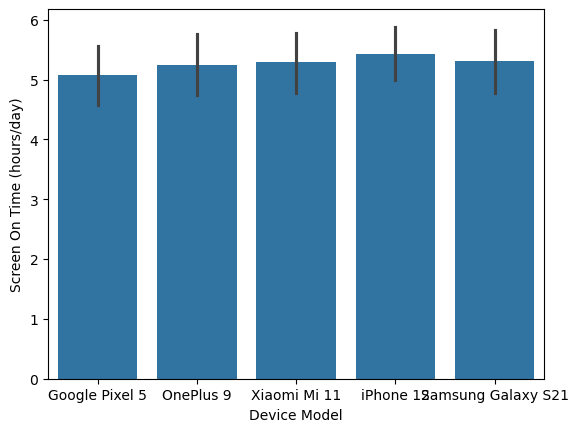

In [15]:
sns.barplot(x="Device Model", y="Screen On Time (hours/day)", data=df)

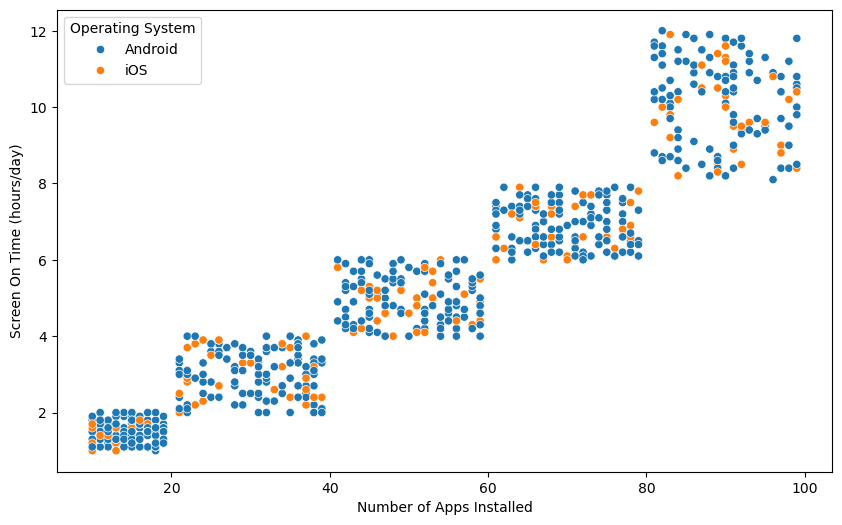

In [17]:
# df[['Number of Apps Installed','Screen On Time (hours/day)']].corr()
# plt.scatter(x='Number of Apps Installed',y='Screen On Time (hours/day)')

plt.figure(figsize=(10, 6))
# plt.scatter(x='Data Usage (MB/day)', y="Screen On Time (hours/day)", data=df)
sns.scatterplot(x='Number of Apps Installed',y='Screen On Time (hours/day)', hue=df['Operating System'],
data=df,palette="tab10")
plt.xlabel("Number of Apps Installed")
plt.show()

<Axes: xlabel='Screen On Time (hours/day)', ylabel='Operating System'>

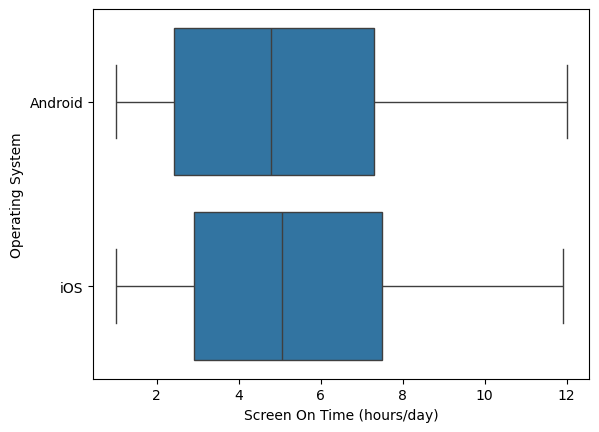

In [19]:
sns.boxplot(x="Screen On Time (hours/day)", y="Operating System", data=df)

In [21]:
import math

print(f"Avg time spent on apps {math.ceil(df['App Usage Time (min/day)'].mean()/60)} hours/day")
print(f"Avg time spent on screen {df['Screen On Time (hours/day)'].mean().round()} hours/day")

age_group=sorted(df['Age'].unique())
print(f"Age Group in this dataset : {age_group[0]} - {age_group[-1]}")

Avg time spent on apps 5 hours/day
Avg time spent on screen 5.0 hours/day
Age Group in this dataset : 18 - 59


In [23]:
print(f"Avg User Behaviour Type is {df['User Behavior Class'].mean().round()}")
df['User Behavior Class'].value_counts()

Avg User Behaviour Type is 3.0


User Behavior Class
2    146
3    143
4    139
5    136
1    136
Name: count, dtype: int64

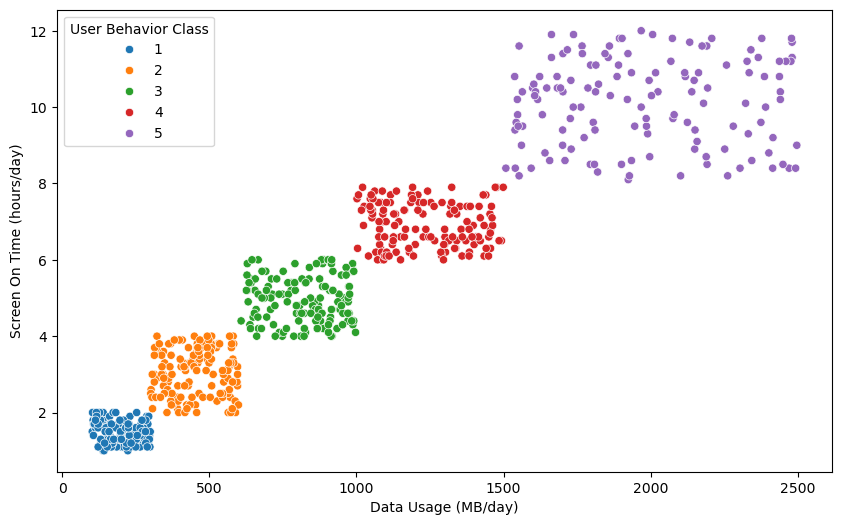

In [25]:
plt.figure(figsize=(10, 6))
# plt.scatter(x='Data Usage (MB/day)', y="Screen On Time (hours/day)", data=df)
sns.scatterplot(x='Data Usage (MB/day)', y="Screen On Time (hours/day)", hue=df['User Behavior Class'],
data=df,palette="tab10")
plt.xlabel("Data Usage (MB/day)")
plt.show()

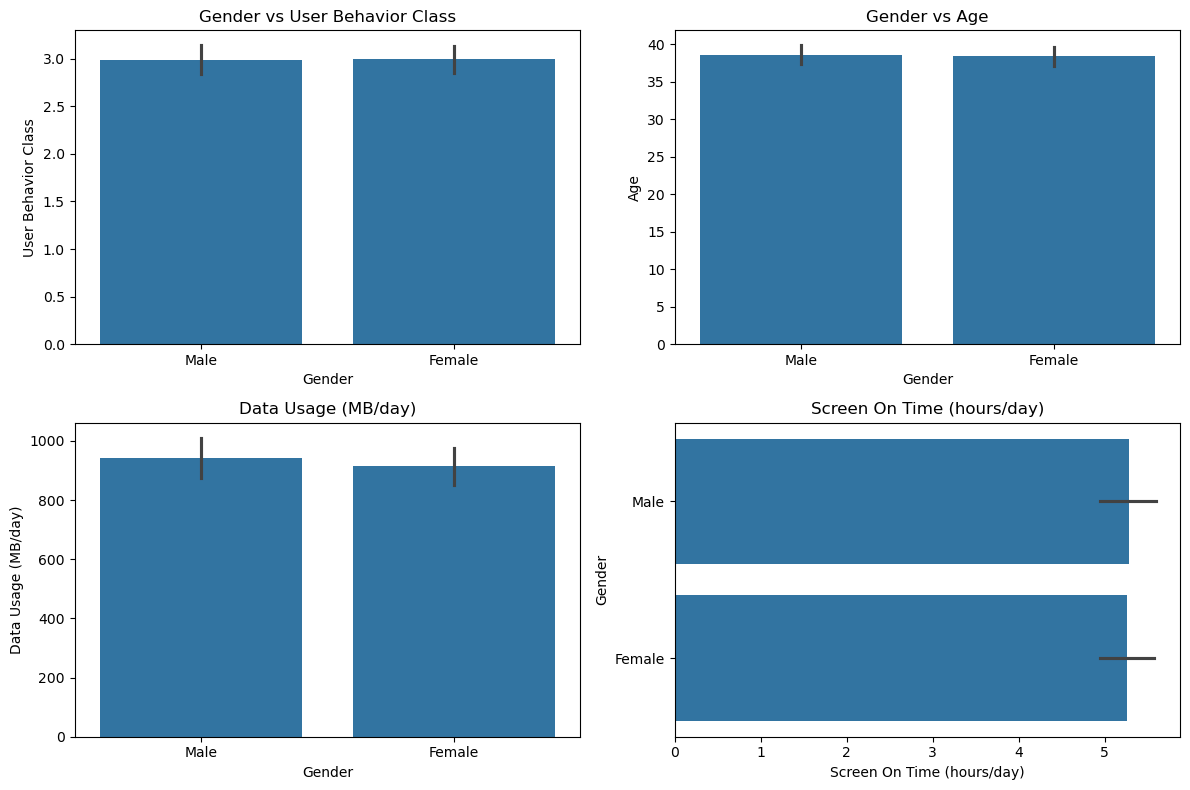

In [27]:
# Plot distribution 
plt.figure(figsize=(12, 8))

# User Behaviour based on Gender
plt.subplot(2, 2, 1)
sns.barplot(x='Gender', y='User Behavior Class', data=df)
plt.title('Gender vs User Behavior Class')

# Gender based on Age
plt.subplot(2, 2, 2)
sns.barplot(x='Gender', y='Age', data=df)
plt.title('Gender vs Age')

# Data Usage
plt.subplot(2, 2, 3)
sns.barplot(x='Gender', y='Data Usage (MB/day)', data=df)
plt.title('Data Usage (MB/day)')

# Screen Time
plt.subplot(2, 2, 4)
sns.barplot(y='Gender', x='Screen On Time (hours/day)', data=df)
plt.title('Screen On Time (hours/day)')
plt.tight_layout()
plt.show()

In [29]:
 # Dimensionality Reduction
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


X=df[['App Usage Time (min/day)','Screen On Time (hours/day)','Data Usage (MB/day)','Battery Drain (mAh/day)']]
y=df['User Behavior Class']


scaler = StandardScaler()
scaled_data=scaler.fit_transform(X)

In [31]:
pca = PCA(n_components=1)
data_pca=pca.fit_transform(scaled_data)

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data_pca,y,test_size=0.30,random_state=42)

In [35]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()
logistic.fit(X_train,y_train)
y_pred=logistic.predict(X_test)

In [37]:
X_test[0],y_pred[0],y_pred[0]

(array([1.25061321]), 4, 4)

In [39]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

score=accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        46
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        50
           4       1.00      1.00      1.00        47
           5       1.00      1.00      1.00        33

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210

[[46  0  0  0  0]
 [ 0 34  0  0  0]
 [ 0  0 50  0  0]
 [ 0  0  0 47  0]
 [ 0  0  0  0 33]]


In [41]:
# manually checking the model
manual_data = np.array([[154,4.0,761,322]]) # target 2
manual_data_scaled = scaler.transform(manual_data)
manual_data_pca=pca.transform(manual_data_scaled)


logistic.predict(manual_data_pca)

array([2], dtype=int64)

In [49]:
from sklearn.cluster import DBSCAN

dbscan=DBSCAN(eps=0.199)

In [51]:
dbscan.fit(data_pca)

DBSCAN(eps=0.199)

In [53]:
dbscan.labels_

array([0, 1, 2, 1, 1, 2, 0, 3, 0, 0, 4, 1, 0, 1, 1, 3, 2, 1, 4, 3, 2, 3,
       0, 1, 1, 2, 0, 3, 0, 0, 1, 1, 1, 4, 3, 4, 2, 3, 0, 0, 1, 3, 2, 2,
       2, 3, 3, 2, 3, 3, 0, 1, 2, 2, 3, 4, 4, 3, 0, 0, 3, 0, 4, 3, 0, 1,
       1, 2, 3, 4, 0, 3, 0, 4, 4, 1, 4, 2, 4, 1, 3, 2, 0, 4, 1, 0, 2, 4,
       2, 0, 2, 1, 4, 2, 0, 0, 3, 3, 4, 1, 4, 1, 2, 1, 2, 4, 2, 4, 1, 1,
       2, 3, 1, 2, 0, 2, 4, 1, 4, 2, 0, 3, 3, 3, 1, 3, 0, 1, 2, 2, 3, 0,
       2, 4, 4, 3, 4, 1, 3, 3, 1, 0, 2, 4, 3, 1, 0, 4, 1, 2, 3, 4, 2, 0,
       4, 2, 4, 0, 0, 2, 4, 4, 0, 4, 1, 3, 3, 4, 1, 3, 2, 4, 2, 0, 4, 1,
       1, 1, 1, 3, 2, 0, 3, 4, 3, 3, 0, 4, 2, 4, 2, 4, 0, 1, 0, 1, 1, 2,
       4, 2, 3, 2, 4, 4, 2, 0, 4, 2, 3, 1, 0, 3, 2, 4, 2, 3, 0, 3, 3, 2,
       0, 2, 0, 3, 2, 3, 0, 1, 2, 0, 2, 3, 3, 2, 2, 4, 3, 0, 4, 3, 4, 3,
       2, 0, 4, 1, 4, 0, 2, 4, 4, 0, 3, 2, 4, 0, 0, 1, 1, 3, 4, 0, 3, 4,
       0, 3, 1, 3, 1, 0, 0, 1, 2, 2, 2, 3, 1, 1, 4, 0, 4, 4, 0, 4, 0, 3,
       0, 1, 2, 4, 0, 4, 4, 1, 3, 4, 0, 2, 1, 2, 0,

(array([139.,   0., 143.,   0.,   0., 146.,   0., 136.,   0., 136.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

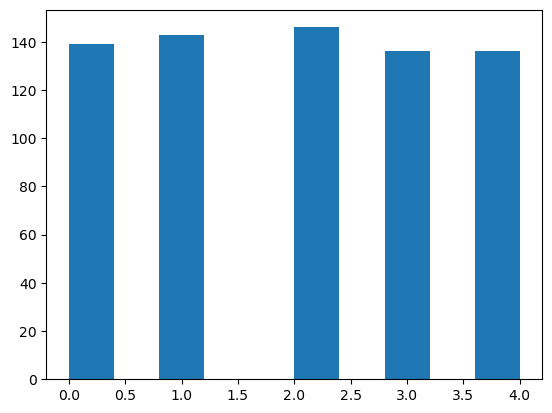

In [55]:
plt.hist(dbcan.labels_)

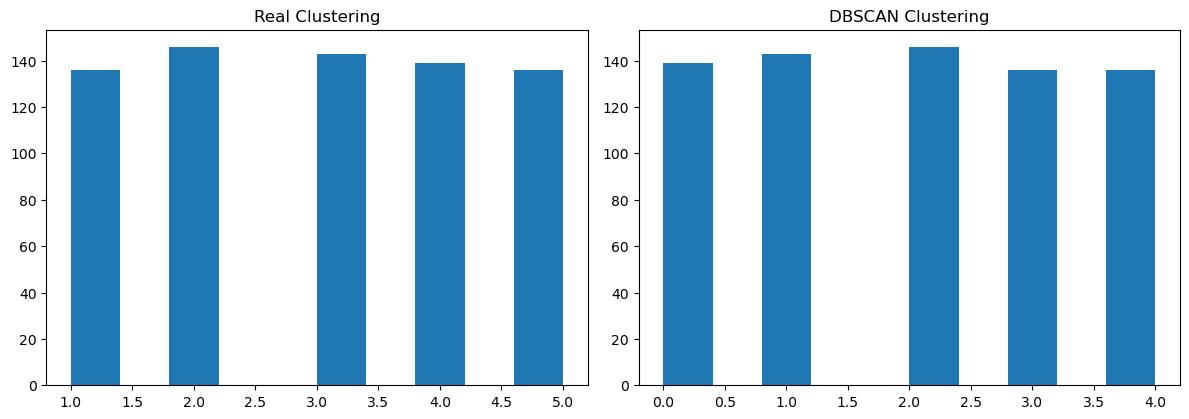

In [57]:
# Plot distribution 
plt.figure(figsize=(12, 8))

# Real Clustering
plt.subplot(2, 2, 1)
plt.hist('User Behavior Class', data=df)
plt.title('Real Clustering')

# DBSCAN Clustering
plt.subplot(2, 2, 2)
plt.hist(dbcan.labels_)
plt.title('DBSCAN Clustering')

plt.tight_layout()
plt.show()